In [1]:
# Prior data
# Location and scale (mean and standard deviation) of a normal distribution
nu_max = (2357.69, 25.0)
delta_nu = (111.84, 0.1)
teff = (5500.0, 200.0)

# Observed data
n = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
nu = [1601.25, 1712.38, 1822.87, 1932.24,
      2042.3 , 2153.48, 2265.2 , 2377.14,
      2488.87, 2601.02, 2713.51, 2826.4 ,
      2939.56, 3052.67]
nu_err = 0.01  # Can be a scalar or a value for each nu

In [2]:
from asterion import GlitchModel

model = GlitchModel(nu_max, delta_nu, teff=teff)

<AxesSubplot:xlabel='n', ylabel='$\\delta\\nu$ ($\\mathrm{\\mu Hz}$)'>

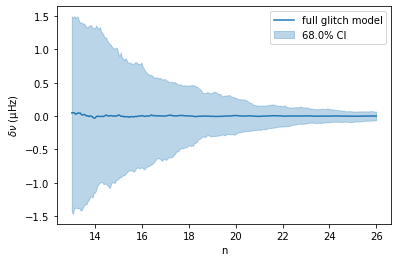

In [3]:
import asterion as ast
from asterion import Inference

infer = Inference(model, n=n, nu=nu, nu_err=nu_err, seed=10)
infer.prior_predictive()  # <-- check prior is sensible
prior_data = infer.get_data()
# Inspect the prior predictive e.g.
ast.plot_glitch(prior_data, group="prior")

In [4]:
# Sample from the posterior
infer.sample()
infer.posterior_predictive()

# Save inference data
data = infer.get_data()
data.to_netcdf("results.nc")  # save inference data as a netCDF4 file

Running nested sampling using the 'multi_ellipsoid' sampler with 50 live points and 50000 maximum samples...


/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:293: FutureWarning: jax.tree_map is deprecated, and will be removed in a future release. Use jax.tree_util.tree_map instead.
  x_dead_new = tree_map(lambda x: x[i_min], state.live_points_X)
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:550: FutureWarning: jax.tree_multimap is deprecated, and will be removed in a future release. Use jax.tree_util.tree_multimap instead.
  live_points_U = tree_multimap(
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jax/_src/tree_util.py:205: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  warnings.warn('jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() '
/Users/grd/Repos/matriculate/matriculate_env/lib/python3.9/site-packages/jaxns/nested_sampling.py:553: FutureWarning

Completed in 19.1 seconds.


'results.nc'

['a_cz', 'a_he', 'b_he', 'cz_amplitude', 'delta_nu', 'dnu_cz', 'dnu_he', 'epsilon', 'he_amplitude', 'log_a_cz', 'log_a_he', 'log_b_he', 'log_tau_cz', 'log_tau_he', 'nu_bkg', 'phi_cz', 'phi_he', 'tau_cz', 'tau_he']


FileNotFoundError: [Errno 2] No such file or directory: 'data/summary.ecsv'

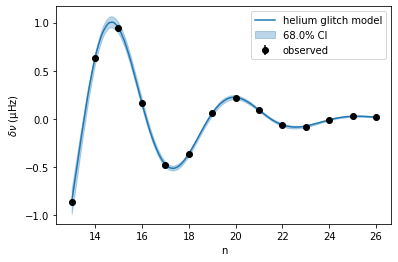

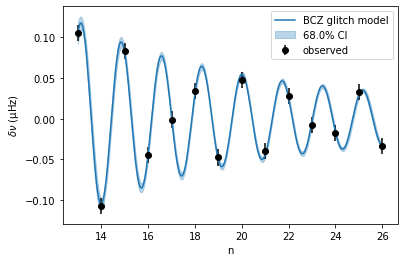

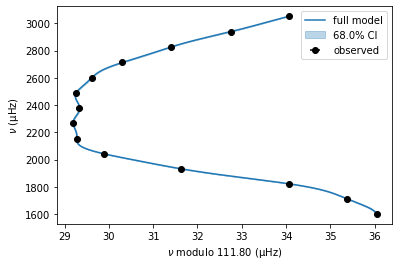

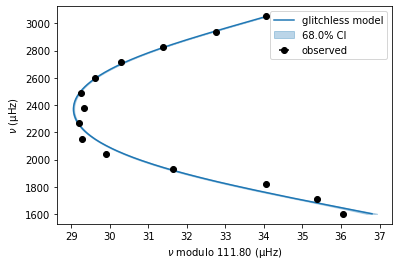

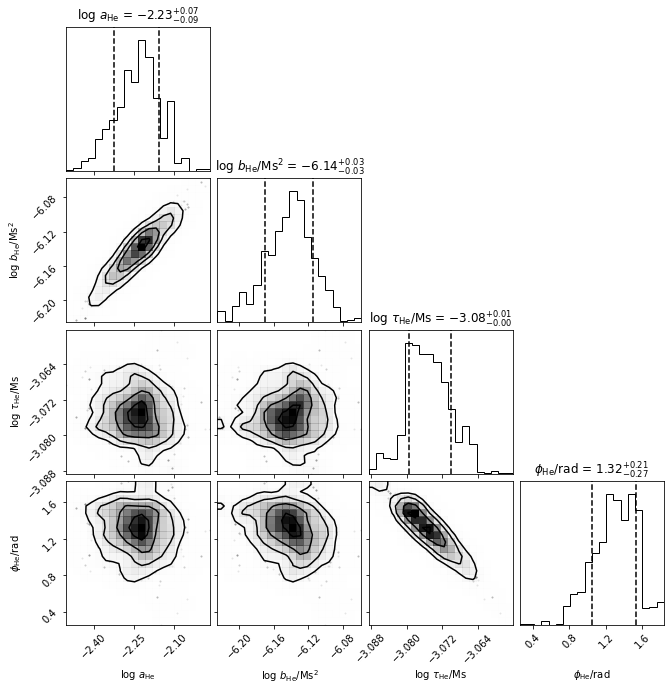

In [5]:
import matplotlib.pyplot as plt

# Posterior predictive check
# Glitch plots
ast.plot_glitch(data, kind="He")
ast.plot_glitch(data, kind="CZ")

# Echelle plots
ast.plot_echelle(data)
ast.plot_echelle(data, kind="glitchless")

# A corner plot of the helium glitch parameters
print(ast.get_var_names(data))  # <-- to view available variable names in the model
ast.plot_corner(data, var_names=["log_a_he", "log_b_he", "log_tau_he", "phi_he"])

# Save summary of results, e.g.
# Here all 0-dimensional parameters are saved in Astropy's ECSV format which
# preserves data types and units
table = ast.get_table(data, dims=(), fmt="astropy")
table.write("data/summary.ecsv", overwrite=True)

plt.show()  # <-- to display the plots